**Challenge1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

In [3]:
# Datasets
infected_dataset = "data/time_series_covid19_confirmed_global.csv"
recovered_dataset = "data/time_series_covid19_recovered_global.csv"
deaths_dataset = "data/time_series_covid19_deaths_global.csv"
countries_dataset ="data/UID_ISO_FIPS_LookUp_Table.csv"

In [4]:
# reading infected datasets
infected = pd.read_csv(infected_dataset)
infected.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
# reading recovered and deaths datasets
recovered = pd.read_csv(recovered_dataset)
deaths = pd.read_csv(deaths_dataset)

In [6]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)
infected.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [8]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df_nigeria = mkframe('Nigeria')
df_niger = mkframe('Niger')
df_ghana = mkframe('Ghana')
print(df_nigeria)
print(df_niger)
print(df_ghana)

            infected  recovered  deaths
2020-01-22         0          0       0
2020-01-23         0          0       0
2020-01-24         0          0       0
2020-01-25         0          0       0
2020-01-26         0          0       0
...              ...        ...     ...
2023-03-05    266598          0    3155
2023-03-06    266598          0    3155
2023-03-07    266598          0    3155
2023-03-08    266598          0    3155
2023-03-09    266598          0    3155

[1143 rows x 3 columns]
            infected  recovered  deaths
2020-01-22         0          0       0
2020-01-23         0          0       0
2020-01-24         0          0       0
2020-01-25         0          0       0
2020-01-26         0          0       0
...              ...        ...     ...
2023-03-05      9508          0     315
2023-03-06      9508          0     315
2023-03-07      9508          0     315
2023-03-08      9508          0     315
2023-03-09      9508          0     315

[1143 rows x 3

In [13]:
df_nigeria

,infected,recovered,deaths
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2023-03-05,266598,0,3155
2023-03-06,266598,0,3155
2023-03-07,266598,0,3155
2023-03-08,266598,0,3155


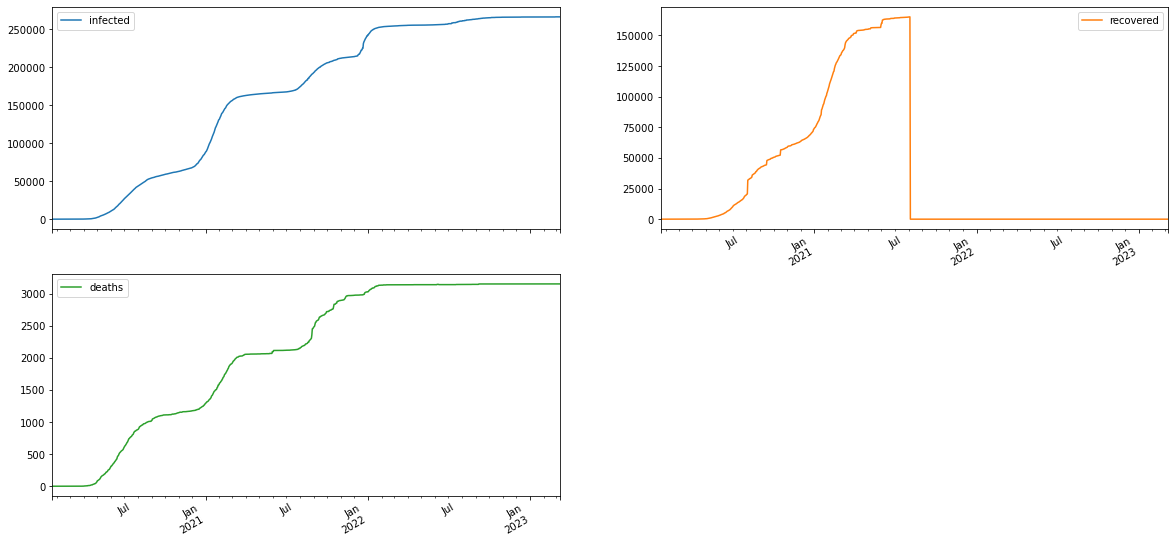

In [17]:
df_nigeria.plot(subplots=True,layout=(2,2),figsize=(20,10))
# df_niger.plot()
# df_ghana.plot()
plt.show()

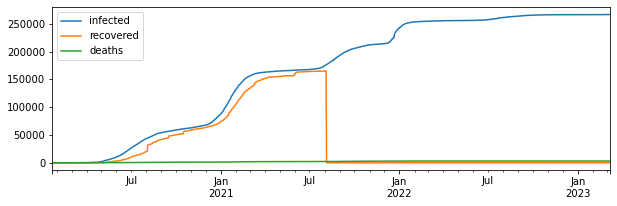

In [ ]:
df_nigeria.plot()
plt.show()

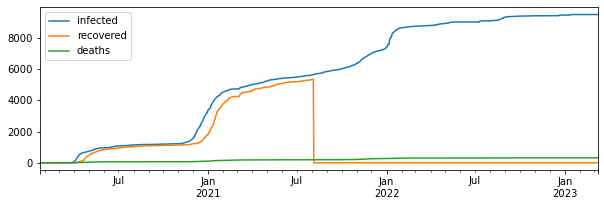

In [ ]:
df_niger.plot()
plt.show()

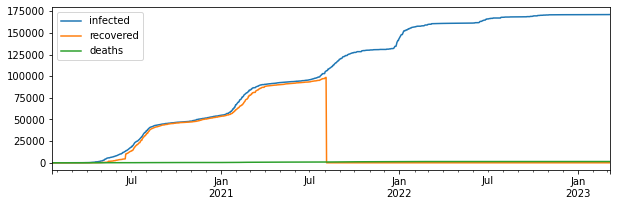

In [ ]:
df_ghana.plot()
plt.show()

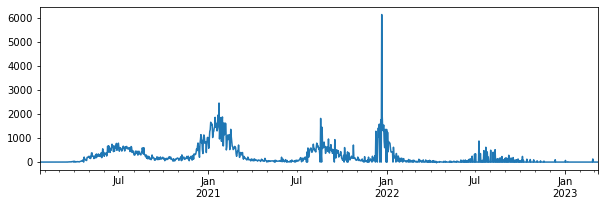

In [ ]:
df_nigeria['ninfected'] = df_nigeria['infected'].diff()
df_nigeria['ninfected'].plot()
plt.show()

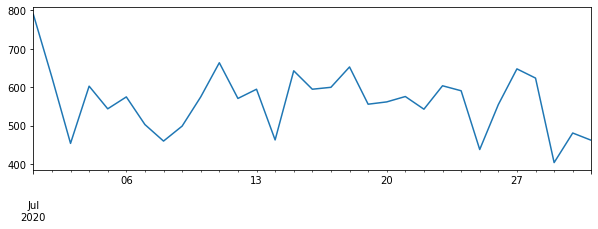

In [ ]:
df_nigeria[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

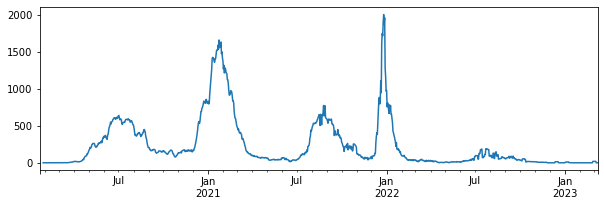

In [ ]:
df_nigeria['ninfav'] = df_nigeria['ninfected'].rolling(window=7).mean()
df_nigeria['ninfav'].plot()
plt.show()

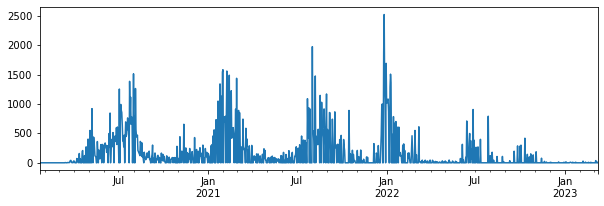

In [ ]:
df_ghana['ninfected'] = df_ghana['infected'].diff()
df_ghana['ninfected'].plot()
plt.show()



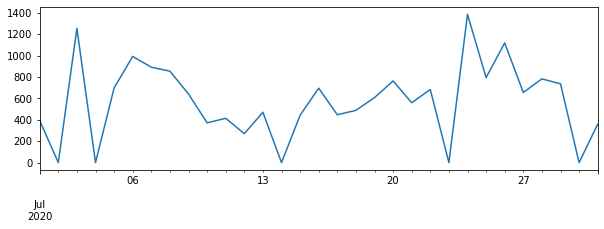

In [ ]:
df_ghana[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

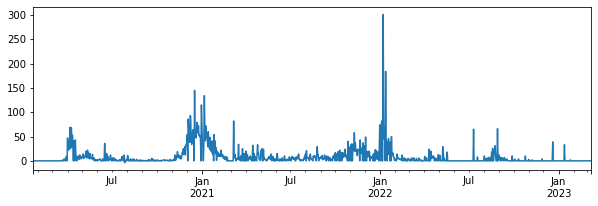

In [ ]:
df_niger['ninfected'] = df_niger['infected'].diff()
df_niger['ninfected'].plot()
plt.show()


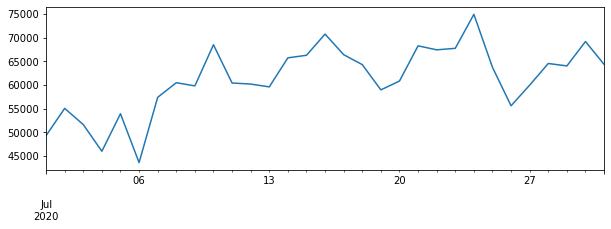

In [ ]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

In [ ]:
countries = pd.read_csv(countries_dataset)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [ ]:
countries[(countries['Country_Region']=='Nigeria') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
471,566,NG,NGA,566.0,NaN,NaN,NaN,Nigeria,9.082,8.6753,Nigeria,206139587.0


**The spread of the pandemic in different countries.**

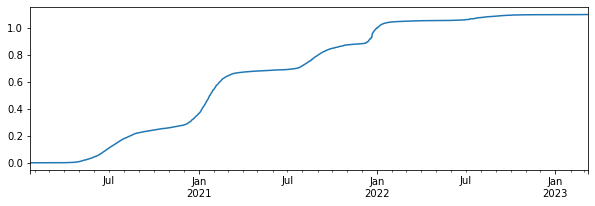

In [ ]:
nigeria_pop = countries[(countries['Country_Region']=='Nigeria') & countries['Province_State'].isna()]['Population'].iloc[0]
df_nigeria['pinfected'] = df_nigeria['infected']*100 / pop
df_nigeria['pinfected'].plot(figsize=(10,3))
plt.show()

<AxesSubplot:>

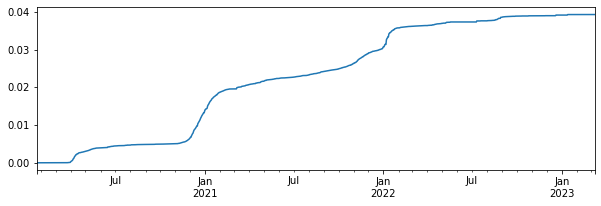

In [ ]:
niger_pop = countries[(countries['Country_Region']=='Niger') & countries['Province_State'].isna()]['Population'].iloc[0]
df_niger['pinfected'] = df_niger['infected']*100 / pop
df_niger['pinfected'].plot(figsize=(10,3))

<AxesSubplot:>

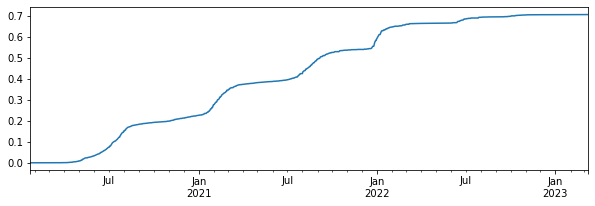

In [ ]:
ghana_pop = countries[(countries['Country_Region']=='Ghana') & countries['Province_State'].isna()]['Population'].iloc[0]
df_ghana['pinfected'] = df_ghana['infected']*100 / pop
df_ghana['pinfected'].plot(figsize=(10,3))

**Plot Rt graphs for several countries on one plot for comparison, or make several plots side-by-side** 

In [ ]:
df_nigeria['Rt'] = df_nigeria['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df_niger['Rt'] = df_niger['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df_ghana['Rt'] = df_ghana['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())


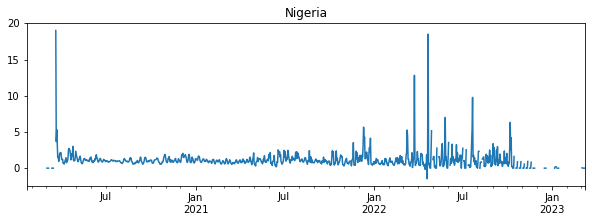

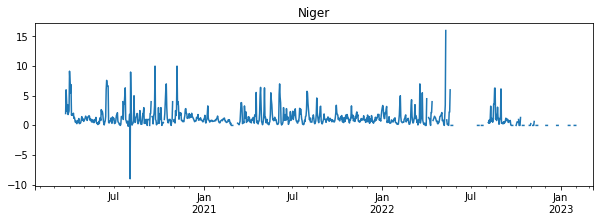

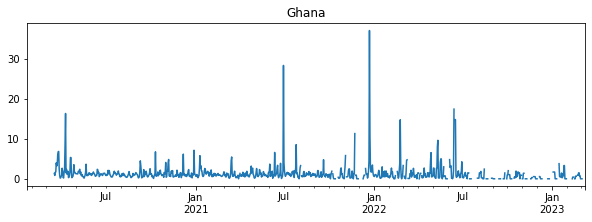

In [ ]:

df_nigeria['Rt'].plot(title="Nigeria",)
plt.show()
df_niger['Rt'].plot(title="Niger",)
plt.show()
df_ghana['Rt'].plot(title="Ghana",)
plt.show()



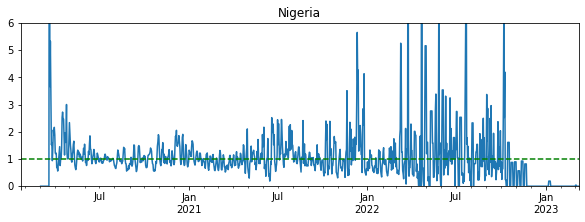

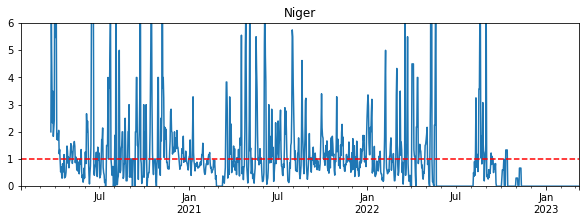

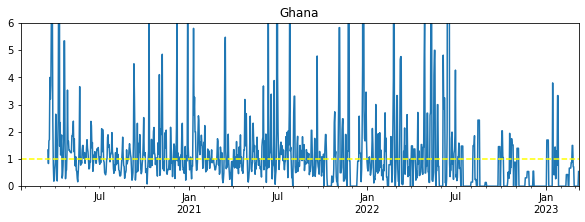

In [ ]:
ax_nigeria = df_nigeria['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3),title="Nigeria")
ax_nigeria.set_ylim([0,6])
ax_nigeria.axhline(1,linestyle='--',color='green')
plt.show()

ax_niger = df_niger['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3),title="Niger")
ax_niger.set_ylim([0,6])
ax_niger.axhline(1,linestyle='--',color='red')
plt.show()

ax_ghana = df_ghana['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3),title="Ghana")
ax_ghana.set_ylim([0,6])
ax_ghana.axhline(1,linestyle='--',color='yellow')
plt.show()


**See how the number of deaths and recoveries correlate with number of infected cases.**

In [ ]:
df_niger[['deaths','recovered']].corr()

,deaths,recovered
deaths,1.000000,-0.205371
recovered,-0.205371,1.000000


Therefore Niger has a low negative correlation of recovered and dead patient

In [ ]:
df_nigeria[['deaths','recovered']].corr()

,deaths,recovered
deaths,1.00000,-0.17286
recovered,-0.17286,1.00000


Therefore Nigeria has alow negative correlation of recovered and dead patient.

In [ ]:
df_ghana[['deaths','recovered']].corr()

,deaths,recovered
deaths,1.000000,-0.361521
recovered,-0.361521,1.000000


Therefore Ghana has a low negative correlation of recovered and dead patient